In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import seaborn as sns

<ipython-input-1-5df2db05d1ff>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


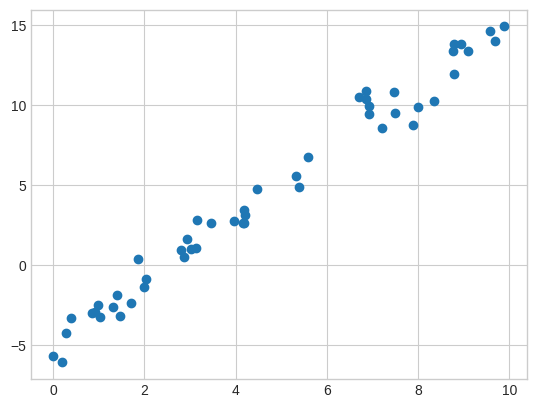

In [ ]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x-5+rng.randn(50)
plt.scatter(x,y)

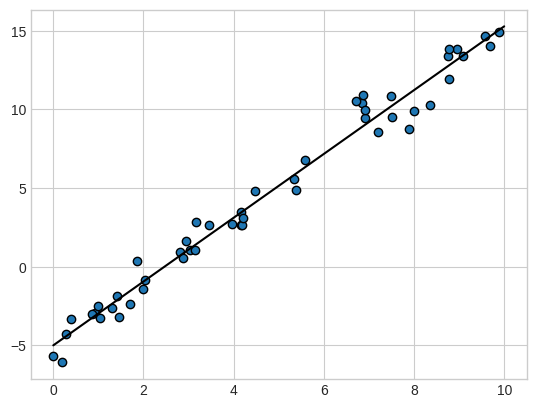

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:,np.newaxis], y)

xfit= np.linspace(0,10,1000)
yfit= model.predict(xfit[:, np.newaxis])
plt.scatter(x,y,edgecolors='Black')
plt.plot(xfit,yfit, color='Black')

In [ ]:
print('Model slope    ', model.coef_[0]  )
print('Model intercept   ', model.intercept_)

Model slope     2.0272088103606953
Model intercept    -4.998577085553204


In [ ]:
rng =np.random.RandomState(1)
X = 10*rng.rand(100,3)
y= 0.5 + np.dot(X,[1.5,-2.,1.])
model.fit(X,y)
print(model.intercept_)
print(model.coef_)

0.5000000000000033
[ 1.5 -2.   1. ]


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2,3,4])
poly = PolynomialFeatures(3,include_bias = False)
poly.fit_transform(x[:,None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [ ]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

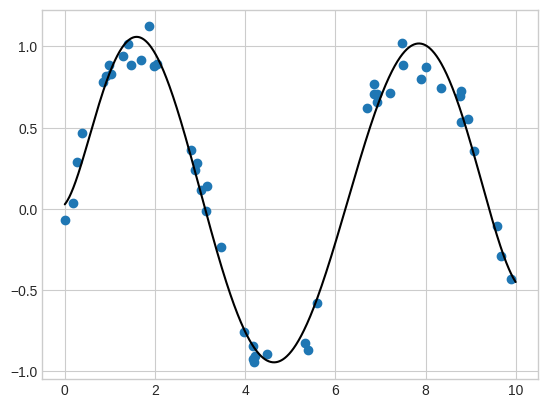

In [ ]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:,np.newaxis],y)
yfit = poly_model.predict(xfit[:,np.newaxis])

plt.scatter(x,y)
plt.plot(xfit,yfit, color='Black')

In [ ]:
from sklearn.pipeline import make_pipeline

(0.0, 10.0)

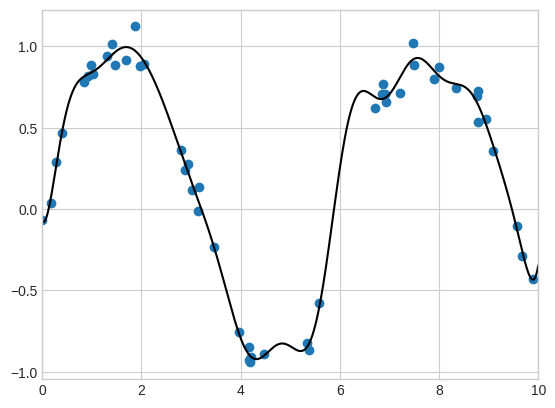

In [ ]:
from sklearn.base import BaseEstimator,TransformerMixin

class GaussianFeatures(BaseEstimator,TransformerMixin):
  """Uniformly spaced Gaussian features for one dimensional input"""

  def __init__(self,N,width_factor=2.0):
    self.N = N
    self.width_factor= width_factor
  @staticmethod
  def _gauss_basis(x,y,width,axis=None):
    arg= (x-y)/width
    return np.exp(-0.5*np.sum(arg**2,axis))
  def fit(self,X,y=None):
    self.centers_ =np.linspace(X.min(), X.max(),self.N)
    self.width_ = self.width_factor*(self.centers_[1]-self.centers_[0])
    return self
  def transform(self,X):
    return self._gauss_basis(X[:,:,np.newaxis],self.centers_
                             ,self.width_,axis=1)

gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())
gauss_model.fit(x[:,np.newaxis],y)
yfit= gauss_model.predict(xfit[:,np.newaxis])

plt.scatter(x,y)
plt.plot(xfit,yfit, color='Black')
plt.xlim(0,10)

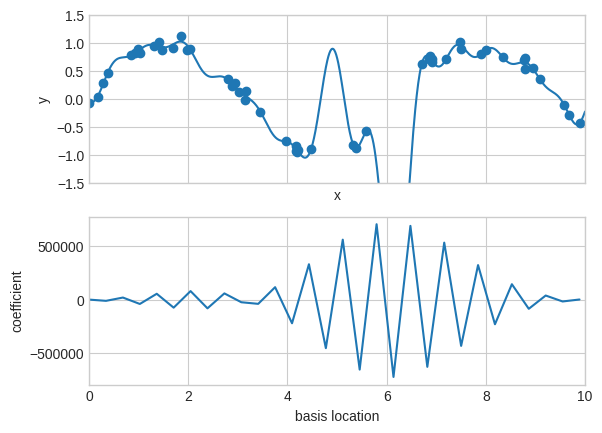

In [ ]:
def basis_plot(model, title=None):
 fig, ax = plt.subplots(2, sharex=True)
 model.fit(x[:, np.newaxis], y)
 ax[0].scatter(x, y)
 ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
 ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
 if title:
  ax[0].set_title(title)
 ax[1].plot(model.steps[0][1].centers_,model.steps[1][1].coef_)
 ax[1].set(xlabel='basis location',ylabel='coefficient',
           xlim=(0, 10))
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

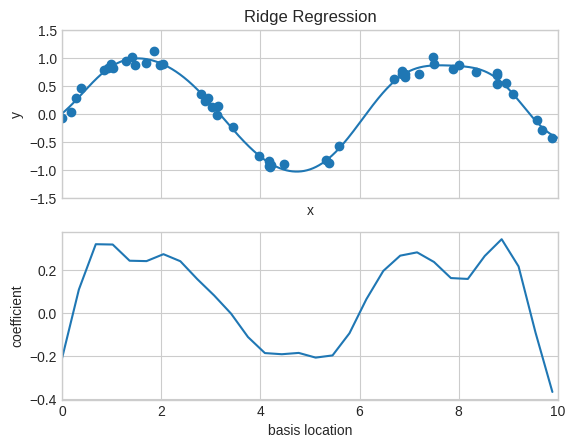

In [ ]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')


---------------------------------------------

In [ ]:
url = 'https://raw.githubusercontent.com/jakevdp/bicycle-data/main'
!curl -O {url}/FremontBridge.csv
!curl -O {url}/SeattleWeather.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4585k  100 4585k    0     0  12.3M      0 --:--:-- --:--:-- --:--:-- 12.3M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  534k  100  534k    0     0  1978k      0 --:--:-- --:--:-- --:--:-- 1986k


In [ ]:
import pandas as pd
counts = pd.read_csv('FremontBridge.csv',
                     index_col='Date',parse_dates=True)
weather = pd.read_csv('SeattleWeather.csv',
                     index_col='DATE',parse_dates=True)

In [ ]:
counts = counts[counts.index< "2020-01-01"]
weather = weather[weather.index< "2020-01-01"]

In [ ]:
daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] #remove other columns

In [ ]:
daily

,Total
Date,
2012-10-03,14084.0
2012-10-04,13900.0
2012-10-05,12592.0
2012-10-06,8024.0
2012-10-07,8568.0
...,...
2019-12-27,4552.0
2019-12-28,3352.0
2019-12-29,3692.0


In [ ]:
days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
for i in range(7):
  daily[days[i]] = (daily.index.dayofweek == i).astype(float)

In [ ]:
daily

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Date,,,,,,,,
2012-10-03,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-05,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-06,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2012-10-07,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
2019-12-27,4552.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2019-12-28,3352.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2019-12-29,3692.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012','2020')
daily = daily.join(pd.Series(1, index=holidays,name='holiday'))
daily['holiday'].fillna(0,inplace=True)

In [ ]:
daily

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday
Date,,,,,,,,,
2012-10-03,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-05,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-06,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-07,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
2019-12-27,4552.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2019-12-28,3352.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2019-12-29,3692.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


(8.0, 17.0)

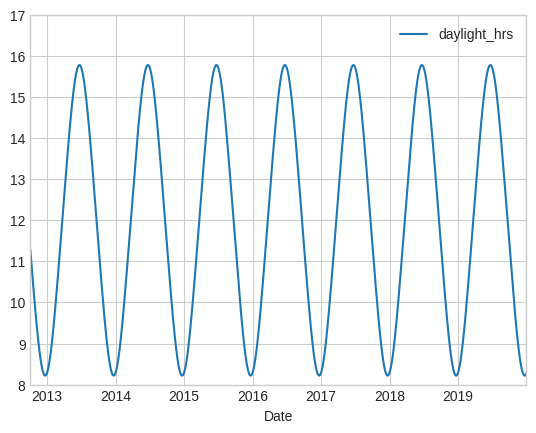

In [ ]:
def hours_of_daylight(date,axis=23.44, latitude=47.61):
  """Compute the hours of daylight for te given date"""
  days = (date - pd.to_datetime('2000-12-21')).days
  m = (1. - np.tan(np.radians(latitude))
  *np.tan(np.radians(axis)*np.cos(days*2*np.pi/365.25)))
  return 24. * np.degrees(np.arccos(1-np.clip(m,0,2)))/180.

daily['daylight_hrs']= list(map(hours_of_daylight,daily.index))
daily[['daylight_hrs']].plot()
plt.ylim(8,17)


In [ ]:
weather['Temp(F)']=0.5*(weather['TMIN']+weather['TMAX'])
weather['Rainfall (in)'] = weather['PRCP']
weather['dry day'] = (weather['PRCP']==0).astype(int)

daily = daily.join(weather[['Rainfall (in)','Temp(F)','dry day']])
daily

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,Rainfall (in),Temp(F),dry day
Date,,,,,,,,,,,,,
2012-10-03,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.00,56.0,1
2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.00,56.5,1
2012-10-05,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.00,59.5,1
2012-10-06,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.00,60.5,1
2012-10-07,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.00,60.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,4552.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.237706,0.01,41.0,0
2019-12-28,3352.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.245532,0.00,44.0,1
2019-12-29,3692.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.254701,0.01,45.5,0


In [ ]:
daily['annual'] = (daily.index - daily.index[0]).days / 365
daily

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,Rainfall (in),Temp(F),dry day,annual
Date,,,,,,,,,,,,,,
2012-10-03,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.00,56.0,1,0.000000
2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.00,56.5,1,0.002740
2012-10-05,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.00,59.5,1,0.005479
2012-10-06,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.00,60.5,1,0.008219
2012-10-07,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.00,60.5,1,0.010959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,4552.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.237706,0.01,41.0,0,7.235616
2019-12-28,3352.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.245532,0.00,44.0,1,7.238356
2019-12-29,3692.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.254701,0.01,45.5,0,7.241096


In [ ]:
daily.dropna(axis = 0 ,how= 'any',inplace=True)

column_names = ['Mon','Tue', 'Wed','Thu','Fri','Sat','Sun','holiday',
                'daylight_hrs','Rainfall (in)','Temp(F)','annual']
X =daily[column_names]
y= daily['Total']

model = LinearRegression(fit_intercept=False)
model.fit(X,y)
daily['predicted'] = model.predict(X)

<Axes: xlabel='Date'>

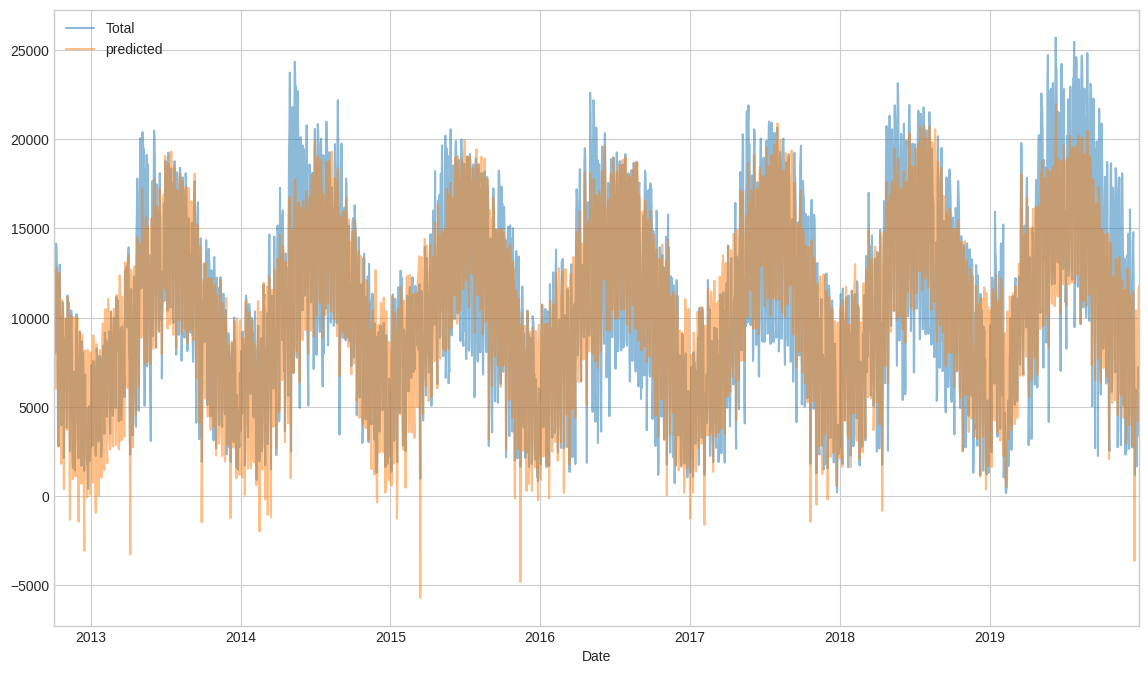

In [ ]:
daily[['Total','predicted']].plot(alpha=0.5,figsize=[14,8])

In [ ]:
params = pd.Series(model.coef_,index=X.columns)
params

Mon              -3213.018108
Tue              -2748.017025
Wed              -2879.370299
Thu              -3457.383441
Fri              -4797.400510
Sat             -10346.949484
Sun             -10728.897699
holiday          -4788.627177
daylight_hrs       445.935255
Rainfall (in)    -4594.322158
Temp(F)            195.322317
annual             327.138478
dtype: float64

In [ ]:
from sklearn.utils import resample
np.random.seed(1)
err = np.std([model.fit(*resample(X,y)).coef_
              for i in range(1000)],0)


In [ ]:
print(pd.DataFrame({'effect': params.round(0),
                    'uncertainty': err.round(0)}))

                effect  uncertainty
Mon            -3213.0        279.0
Tue            -2748.0        284.0
Wed            -2879.0        280.0
Thu            -3457.0        283.0
Fri            -4797.0        275.0
Sat           -10347.0        272.0
Sun           -10729.0        284.0
holiday        -4789.0        399.0
daylight_hrs     446.0         29.0
Rainfall (in)  -4594.0        244.0
Temp(F)          195.0          7.0
annual           327.0         24.0
